# Music dataset analysis

dataset source<br>
https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_df = pd.read_csv('User_Listening_History.csv')
music_df = pd.read_csv('Music_Info.csv')

## Explore user dataframe

In [3]:
user_df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='playcount', ylabel='Count'>

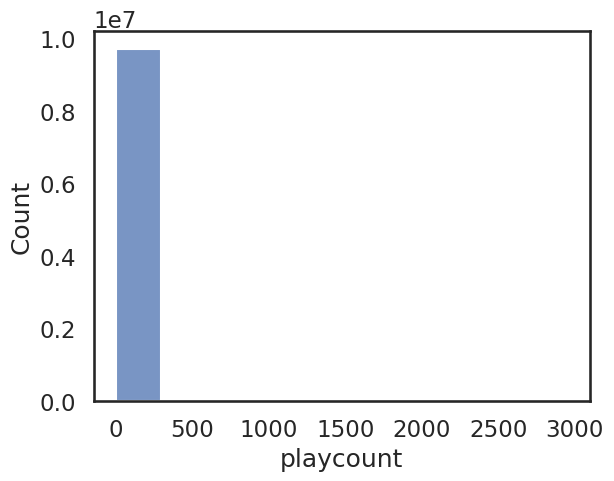

In [4]:
sns.set_theme(style="white", context="talk")
sns.histplot(user_df['playcount'], bins=10)

In [9]:
# get track id with most plays
# row with highest playcount
highrow = user_df.loc[user_df['playcount'].idxmax()]
print(highrow)

# row in music_df with this track id
music_df.loc[music_df['track_id'] == highrow['track_id']]

track_id                           TRUBSZM128F422ABDE
user_id      1854daf178674bbac9a8ed3d481f95b76676b414
playcount                                        2948
Name: 9690999, dtype: object


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
28944,TRUBSZM128F422ABDE,Sweet Escape,Alesso,https://p.scdn.co/mp3-preview/c4497002f6989796...,0Wz6vFHimAwaU2A1iMDc9c,"pop, dance, trance",NaN,2016,231160,0.572,...,2,-3.811,1,0.0427,0.0772,0.000001,0.128,0.483,126.013,4


/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='playcount', ylabel='Count'>

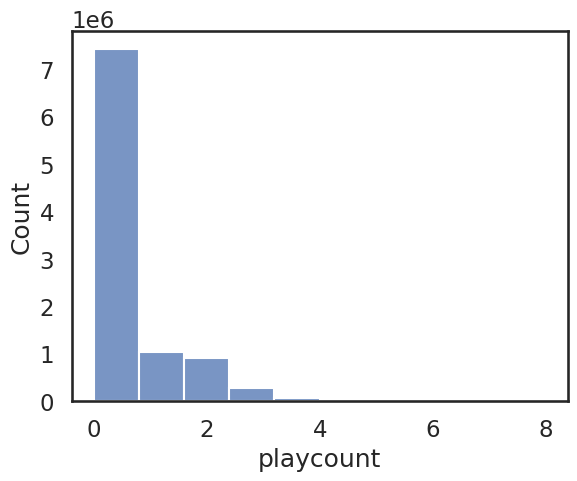

In [5]:
log_playcount = np.log(user_df['playcount'])
sns.histplot(log_playcount, bins=10)

In [6]:
len(user_df)

9711301

In [7]:
x = 20
user_df_less_than_x = user_df[user_df['playcount'] <= x]

In [8]:
len(user_df_less_than_x)

9608283

In [9]:
# check if all track_id's in user_df are in music_df
track_id = user_df_less_than_x['track_id']
track_id_in_music_df = track_id.isin(music_df['track_id'])
track_id_in_music_df.value_counts()


track_id
True    9608283
Name: count, dtype: int64

/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


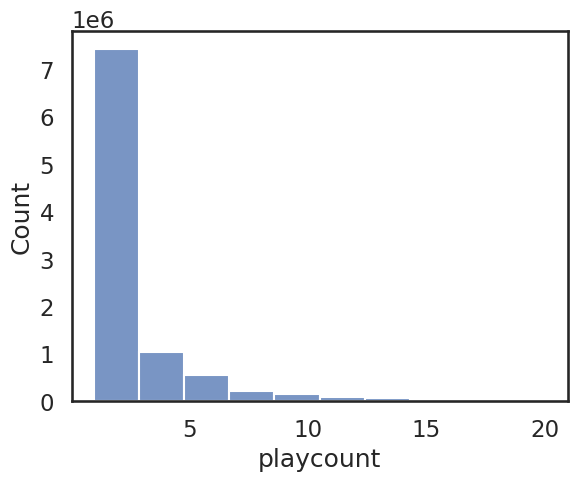

In [10]:
# seaborn histogram of play counts
sns.histplot(user_df_less_than_x['playcount'], bins=10)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

## Explore music dataframe

In [11]:
len(music_df)

50683

In [12]:
music_df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [13]:
music_df.dtypes

track_id                object
name                    object
artist                  object
spotify_preview_url     object
spotify_id              object
tags                    object
genre                   object
year                     int64
duration_ms              int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
dtype: object

In [14]:
# numerical features
num_features = ['year', 'duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']

In [15]:
# to_numerical
for feature in num_features:
    music_df[feature] = pd.to_numeric(music_df[feature])

/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tempo', ylabel='Count'>

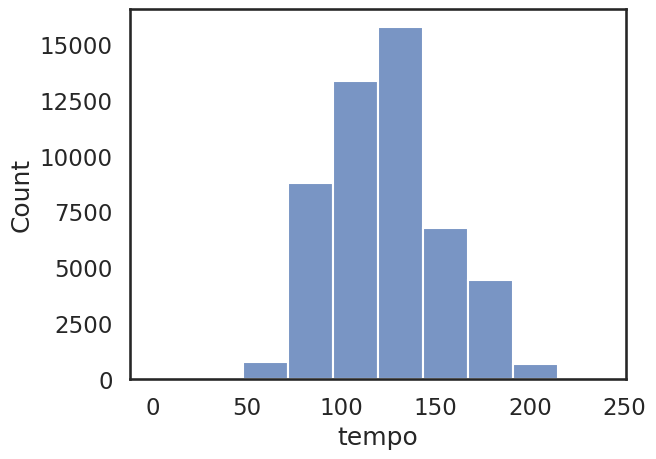

In [16]:
# danceability distribution
sns.histplot(music_df['tempo'], bins=10)

/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/berry/anaconda3/envs/PAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='genre', ylabel='Count'>

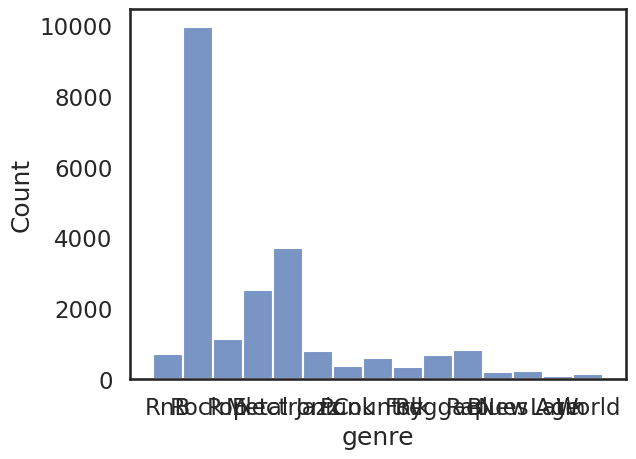

In [17]:
# histogram of genres
sns.histplot(music_df['genre'])

In [18]:
# pie chart of genres
genre_count = music_df['genre'].value_counts()

genre_count

genre
Rock          9965
Electronic    3710
Metal         2516
Pop           1145
Rap            821
Jazz           793
RnB            696
Reggae         691
Country        607
Punk           383
Folk           355
New Age        237
Blues          189
World          140
Latin          100
Name: count, dtype: int64

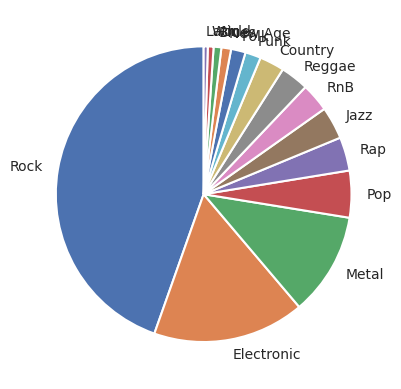

In [19]:
# plot pie of genres
plt.pie(genre_count, labels=genre_count.index, startangle=90, textprops={'fontsize': 10})

plt.show()


In [20]:
# timeline to chart the popularity of musical genres by year
# create aggregate df to count the number of songs in each genre by year

# remove missing genre values
popularity = music_df[music_df['genre'].notna()]

popularity = popularity.groupby(['year', 'genre']).size().reset_index(name='counts')

pivot_popularity = popularity.pivot(index='year', columns='genre', values='counts').fillna(0)


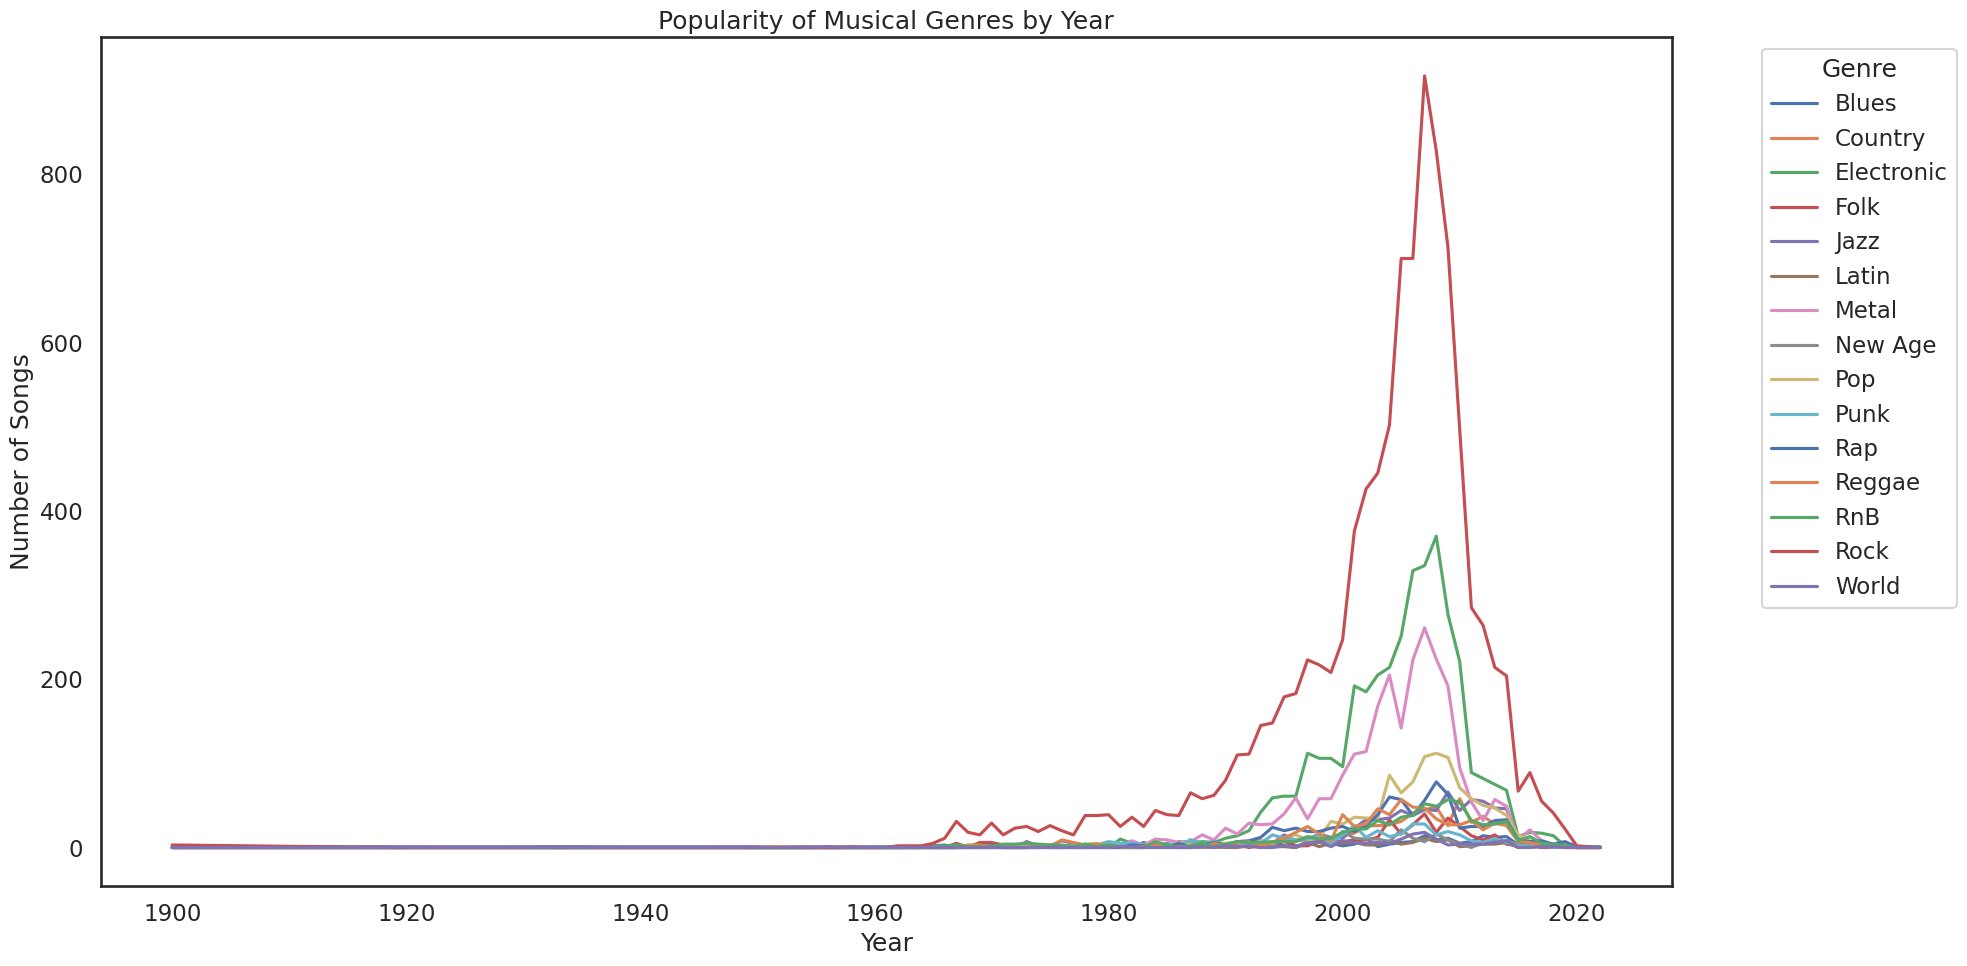

In [21]:
pivot_popularity.plot(kind='line', figsize=(20, 10), title='Popularity of Musical Genres by Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()

In [22]:
pivot_popularity.head()

genre,Blues,Country,Electronic,Folk,Jazz,Latin,Metal,New Age,Pop,Punk,Rap,Reggae,RnB,Rock,World
year,,,,,,,,,,,,,,,
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
1919,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1933,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
#

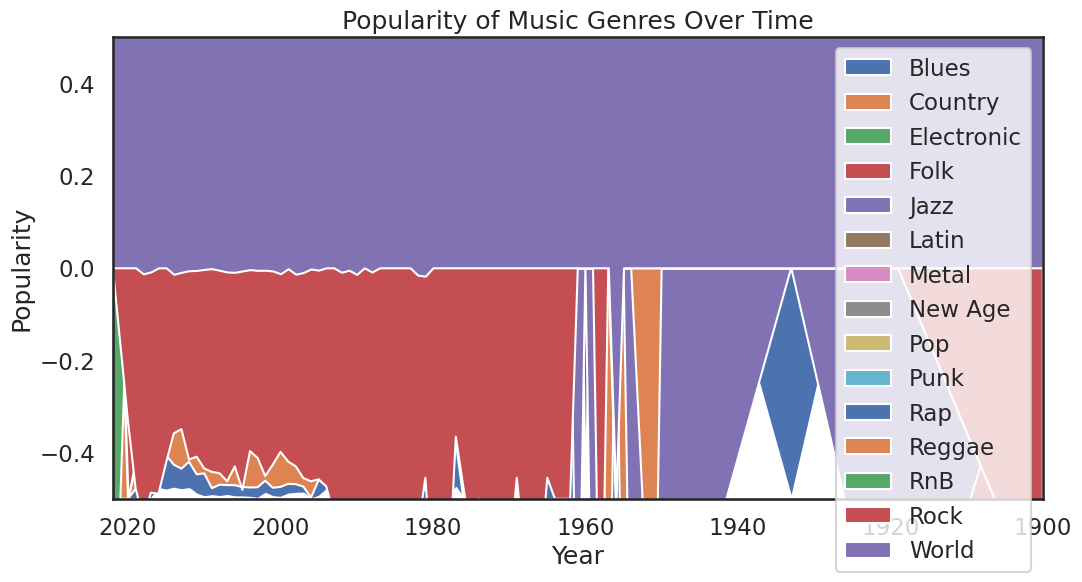

In [24]:
# streamgraph or theme river of genres over the years
# normalize data
music_df_norm = pivot_popularity.div(pivot_popularity.sum(axis=1), axis=0)

music_df_mid = music_df_norm.cumsum(axis=1) - (music_df_norm.sum(axis=1) / 2).values.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(12, 6))

# reverse dataframe order
music_df_norm = music_df_norm.iloc[::-1]
music_df_mid = music_df_mid.iloc[::-1]

for i, genre in enumerate(music_df_norm.columns):
    if i == 0:
        bottom_series = -music_df_mid.iloc[:, i]
    else:
        bottom_series = music_df_mid.iloc[:, i - 1] - music_df_mid.iloc[:, i]
    
    top_series = music_df_mid.iloc[:, i]

    ax.fill_between(music_df_norm.index, bottom_series, top_series, label=genre)

ax.set_xlim(music_df_norm.index[0], music_df_norm.index[-1])
ax.set_ylim(-0.5, 0.5)  # Adjust if necessary
ax.legend(loc='upper right')
ax.set_title('Popularity of Music Genres Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')

plt.show()

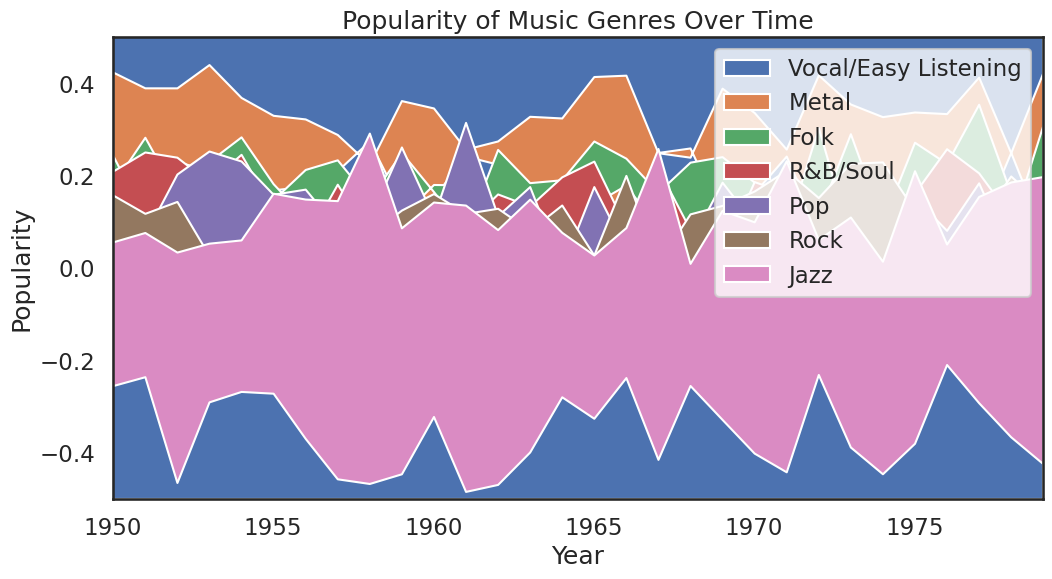

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
years = range(1950, 1980)
genres = ['Jazz', 'Rock', 'Pop', 'R&B/Soul', 'Folk', 'Metal', 'Vocal/Easy Listening']

# This would be your actual data
data = np.random.rand(len(years), len(genres))
df = pd.DataFrame(data, index=years, columns=genres)

# Normalize the data
df_norm = df.div(df.sum(axis=1), axis=0)

# Find the mid-point of the data
df_mid = df_norm.cumsum(axis=1) - (df_norm.sum(axis=1) / 2).values.reshape(-1, 1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# We need to reverse the DataFrame order to plot with fill_between
df_norm = df_norm.iloc[:, ::-1]
df_mid = df_mid.iloc[:, ::-1]

for i, genre in enumerate(df_norm.columns):
    # The fill_between function requires a top and bottom series
    if i == 0:
        bottom_series = -df_mid.iloc[:, i]
    else:
        bottom_series = df_mid.iloc[:, i-1] - df_mid.iloc[:, i]
    
    top_series = df_mid.iloc[:, i]
    
    ax.fill_between(df_norm.index, bottom_series, top_series, label=genre)

# Additional customizations
ax.set_xlim(df_norm.index[0], df_norm.index[-1])
ax.set_ylim(-0.5, 0.5)  # Adjust if necessary
ax.legend(loc='upper right')
ax.set_title('Popularity of Music Genres Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')

plt.show()

In [26]:
# check if Cardi B is in music_df, just because she is modern
music_df[music_df['artist'] == 'Cardi B']

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
14993,TRCSJHC128F9336428,Be Careful,Cardi B,https://p.scdn.co/mp3-preview/befe3cd3011f62ef...,2Yl4OmDby9iitgNWZPwxkd,"rap, blues, hip_hop, american, rnb",NaN,2018,210787,0.820,...,6,-8.230,0,0.411,0.0256,0.000000,0.0952,0.535,152.279,4
15008,TRUEERB128F4288B1F,Please Me,Cardi B,https://p.scdn.co/mp3-preview/a25d43f3262e0762...,0PG9fbaaHFHfre2gUVo7AN,"soul, rap, hip_hop, rnb",NaN,2019,200889,0.747,...,1,-6.711,1,0.081,0.0642,0.000000,0.0832,0.650,133.992,4
29510,TRHZPRU12903CA1EFA,Money Bag,Cardi B,https://p.scdn.co/mp3-preview/3157a8e45586829b...,1vBeIXlzbAieGoDqInav5j,"rap, hip_hop, house",NaN,2018,229004,0.947,...,10,-6.138,0,0.124,0.1070,0.000691,0.1080,0.454,129.977,4


In [27]:
# check for max year and min year in music_df
max_year = music_df['year'].max()
min_year = music_df['year'].min()
print(max_year)
print(min_year)


2022
1900


In [28]:
music_df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [29]:
# music_df missing values
music_df.isnull().sum()

track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

In [30]:
# head of music_df rows where genre is not missing
music_df[music_df['genre'].notnull()].head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
8,TRMZXEW128F9341FD5,The Scientist,Coldplay,https://p.scdn.co/mp3-preview/95cb9df1b056d759...,0GSSsT9szp0rJkBrYkzy6s,"rock, alternative, indie, pop, alternative_roc...",Rock,2007,311014,0.566,...,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4
10,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,2003,265506,0.554,...,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275,4
12,TRYEZGE128F92D04C8,Feel Good Inc.,Gorillaz,https://p.scdn.co/mp3-preview/7388c425022ced92...,09xrHi86kLkEIzDLZiHNnv,"rock, electronic, alternative, indie, pop, alt...",RnB,2010,223106,0.809,...,6,-7.776,1,0.1360,0.033700,0.001410,0.8260,0.832,138.556,4


<Axes: xlabel='year'>

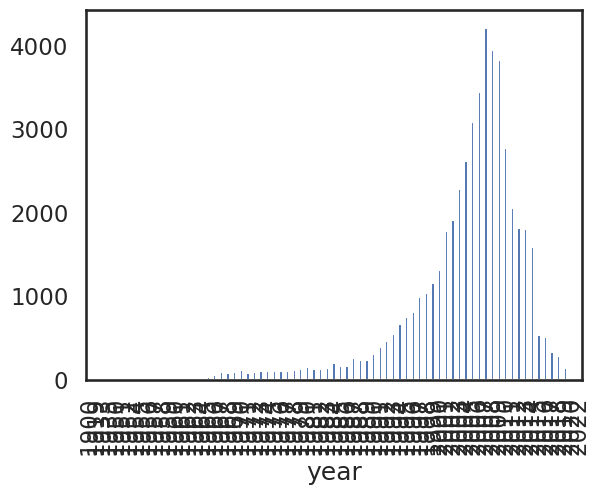

In [31]:
# plot distribution of year
music_df_by_year = music_df.groupby('year').count()
music_df_by_year['track_id'].plot(kind='bar')

<Axes: xlabel='year'>

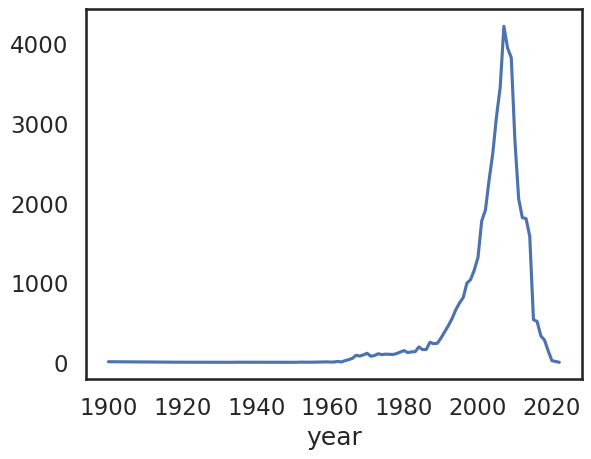

In [32]:
music_df_by_year['track_id'].plot(kind='line')

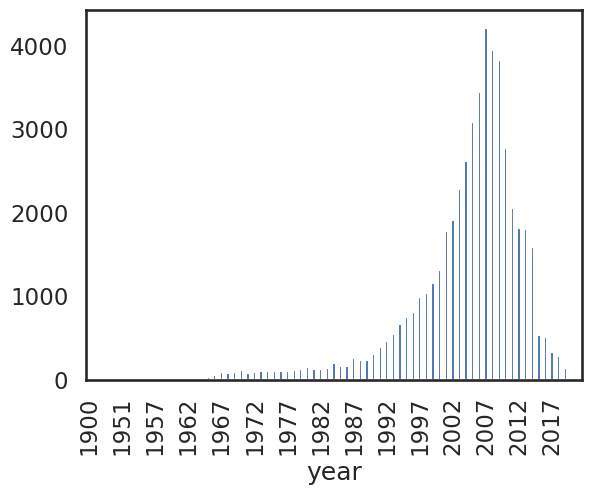

In [33]:
# plot distribution of year with tick labels occuring every 5 years
music_df_by_year = music_df.groupby('year').count()
music_df_by_year['track_id'].plot(kind='bar')
plt.xticks(np.arange(0, len(music_df_by_year), 5))
plt.show()


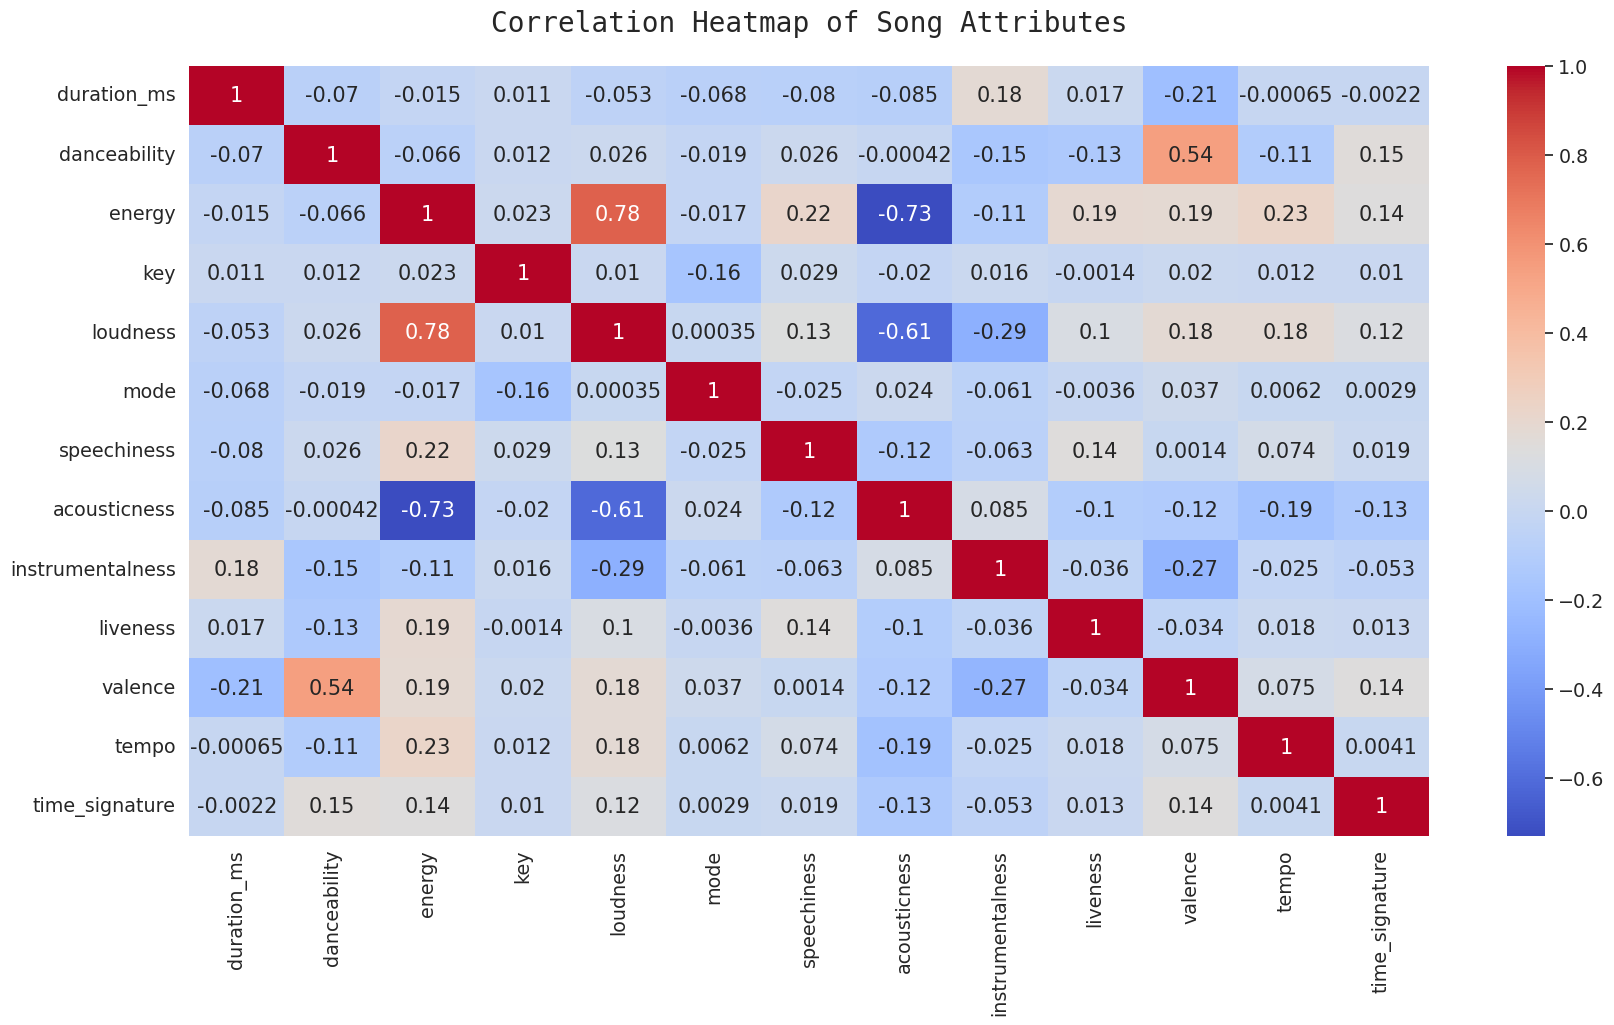

In [34]:
# correlation between song attributes
heatmap_df = music_df[['duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']]

font = {'fontname' : 'Monospace', 'fontsize' : '20', 'pad' : '25'}
sns.set(font_scale=1.25)

plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap of Song Attributes', **font)

sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm')
plt.show()